This notebook is an analysis of the freezing tolerance x wood density trade off 4x5 run. 
There are six PFTs


In [2]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt

Read in single month of data from end of simulation. 

In [3]:
pfile='/glade/u/home/rfisher/python_scripts/fix7trop_htrepro.nc'
params=xr.open_dataset(pfile)
print(params.fates_seed_dbh_repro_threshold)
#print(params.fates_mort_freezetol)

<xarray.DataArray 'fates_seed_dbh_repro_threshold' (fates_pft: 7)>
array([ 2.,  5., 10., 15., 20., 25., 35.])
Dimensions without coordinates: fates_pft
Attributes:
    units:      cm
    long_name:  the diameter (if any) where the plant will start extra clonal...


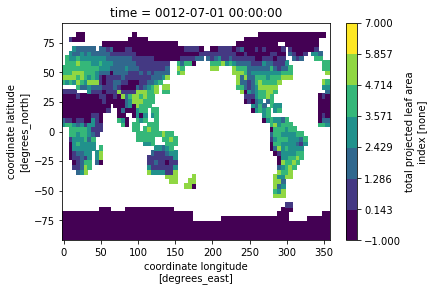

In [5]:
run = 'testnextapi_f45_fates'
run = 'testnextapi_f45_fates_dens_v_ft'
scratch = '/glade/scratch/rfisher/'
year = '0012'
month = '06'
file = scratch + run + '/run/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
file = scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.' + year + '-' + month + '.nc'
f_dat = xr.open_dataset(file)
lai = f_dat.TLAI
lai.plot(vmin=-1, vmax=7, levels=8)

Plot fractional biomass of each PFT

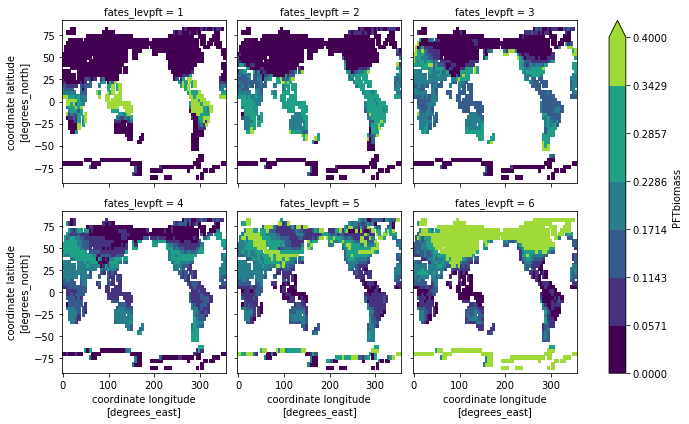

In [6]:
PFTbiomass = f_dat.PFTbiomass[0,0:6,:,:]
sumB=np.sum(PFTbiomass,0)
normB = PFTbiomass/sumB
plot = normB.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, levels=8, vmin=0 , vmax = 0.4)

Sum indivs. This is too high in general

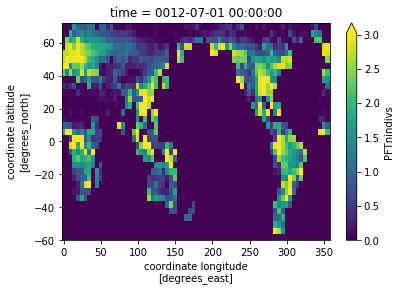

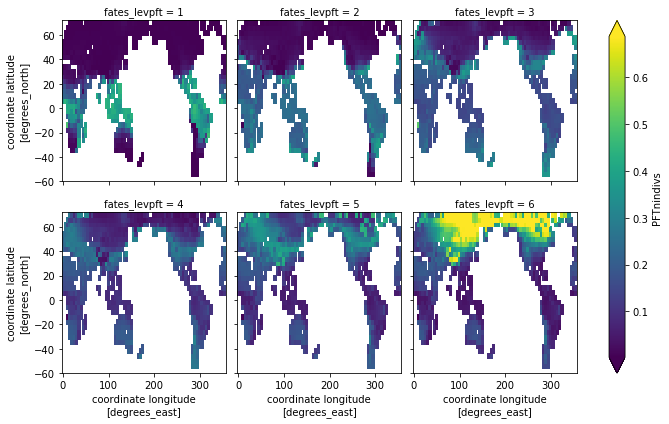

In [7]:
PFTnindivs = f_dat.PFTnindivs[0,0:6,8:41,:]
sumN=np.sum(PFTnindivs,0)
normN = PFTnindivs/sumN
logn=np.log10(PFTnindivs)
sumN.plot(robust=True)
pplot = normN.plot(x='lon', y='lat', col='fates_levpft', col_wrap=3, robust=True )

In [5]:
arc= scratch + '/archive/' + run + '/lnd/hist/' + run + '.clm2.h0.'
#arc= scratch  + run + '/run/' + run + '.clm2.h0.'
ds = xr.open_mfdataset((arc + '*01.nc'))

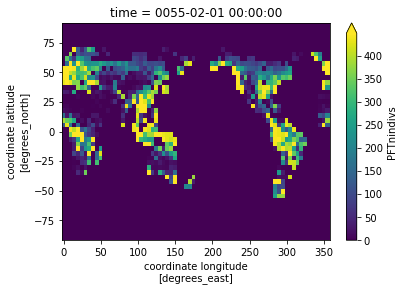

In [6]:
Pnid = ds.PFTnindivs[:,[0,1,2,3,4,5],:,:]
sumN=np.sum(Pnid,1)
sumNt=sumN[Pnid.sizes['time']-1,:,:]
sumNt.plot(robust=True)

In [7]:
pnid1 = Pnid[:,0,:,:] /sumN
pnid1.attrs['standard_name'] = 'frac indiv PFT1'
#pplot = pnid1.plot(x='lon', y='lat', col='time', col_wrap=3 ,robust=True)

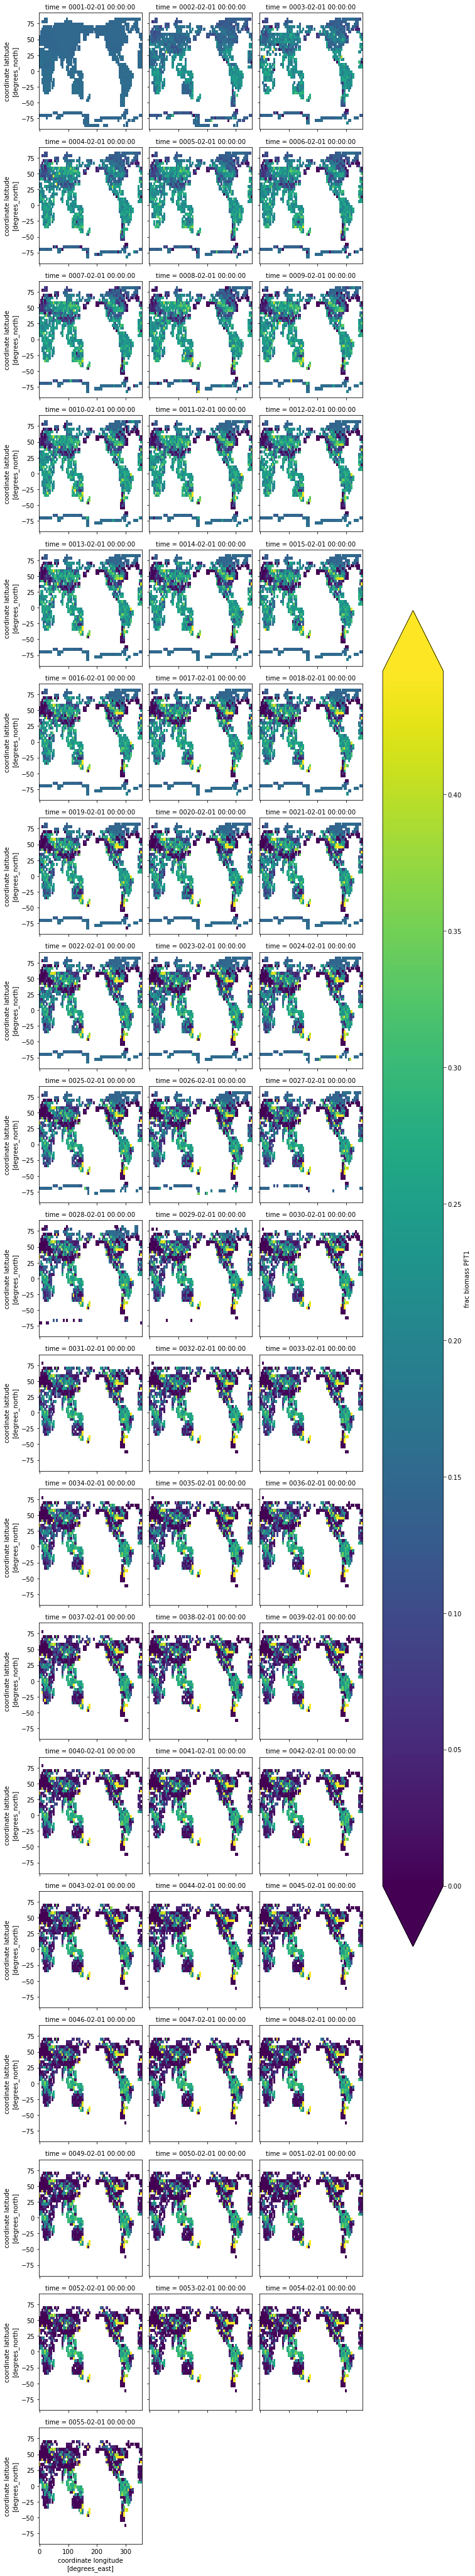

In [8]:
Pnid = ds.PFTbiomass[:,0:6,:,:]
sumB=np.sum(Pnid,1)
pnid1 = Pnid[:,0,:,:]/sumB
pnid1.attrs['standard_name'] = 'frac biomass PFT1'
pplot = pnid1.plot(x='lon', y='lat', col='time', col_wrap=3, robust=True)

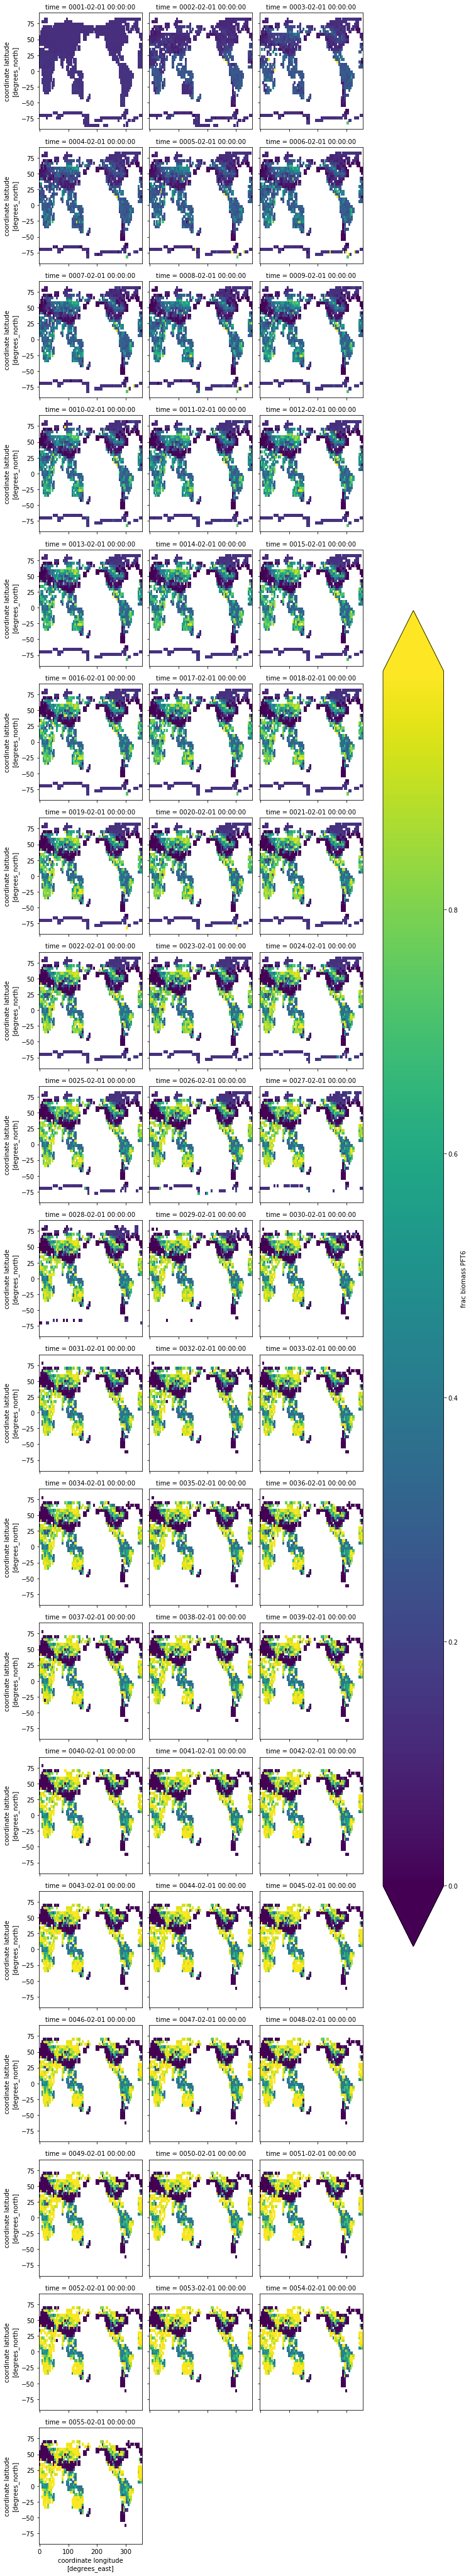

In [9]:
Pnid = ds.PFTbiomass[:,0:6,:,:]
sumB=np.sum(Pnid,1)
pnid1 = Pnid[:,5,:,:]/sumB
pnid1.attrs['standard_name'] = 'frac biomass PFT6'
pplot = pnid1.plot(x='lon', y='lat', col='time', col_wrap=3, robust=True)

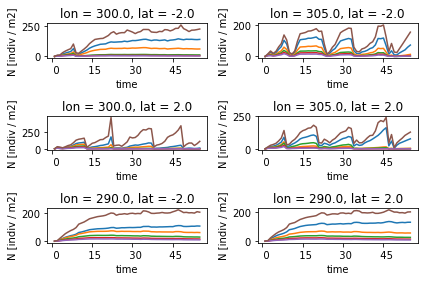

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ds.PFTnindivs.attrs['long_name'] = 'N'
pbiomasst=ds.PFTnindivs.isel(lat=22, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.PFTnindivs.isel(lat=22, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=ds.PFTnindivs.isel(lat=23, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.PFTnindivs.isel(lat=23, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=ds.PFTnindivs.isel(lat=22, lon=58, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.PFTnindivs.isel(lat=23, lon=58, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()

plt.draw()

In [11]:
y=np.where(ds.lon == 300)
y

(array([60]),)

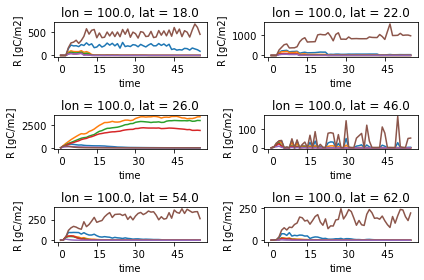

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ln = 20
ds.PFTbiomass.attrs['long_name'] = 'R'
pbiomasst=ds.PFTbiomass.isel(lat=27, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=28, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds.PFTbiomass.isel(lat=29, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=34, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)

pbiomasst=ds.PFTbiomass.isel(lat=36, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=38, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()

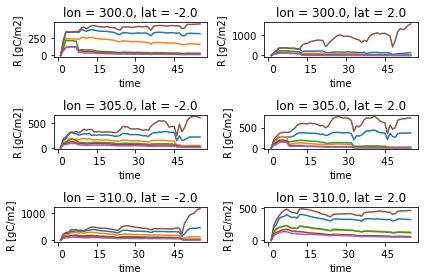

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ds.PFTbiomass.attrs['long_name'] = 'R'

pbiomasst=ds.PFTbiomass.isel(lat=22, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=23, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds.PFTbiomass.isel(lat=22, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=23, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)

pbiomasst=ds.PFTbiomass.isel(lat=22, lon=62, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=23, lon=62, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)

plt.tight_layout()
plt.draw()

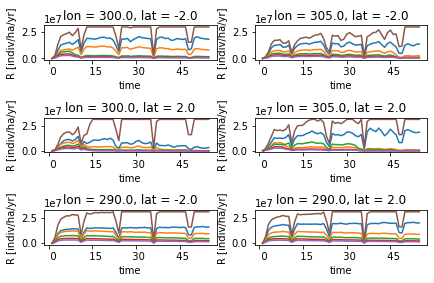

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ds.RECRUITMENT.attrs['long_name'] = 'R'
pbiomasst=ds.RECRUITMENT.isel(lat=22, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=22, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=23, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=23, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=22, lon=58, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.RECRUITMENT.isel(lat=23, lon=58, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()

plt.draw()

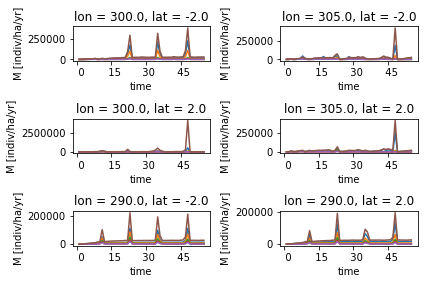

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ds.MORTALITY.attrs['long_name'] = 'M'
pbiomasst=ds.MORTALITY.isel(lat=22, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.MORTALITY.isel(lat=22, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)
pbiomasst=ds.MORTALITY.isel(lat=23, lon=60, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.MORTALITY.isel(lat=23, lon=61, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)
pbiomasst=ds.MORTALITY.isel(lat=22, lon=58, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.MORTALITY.isel(lat=23, lon=58, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()

plt.draw()

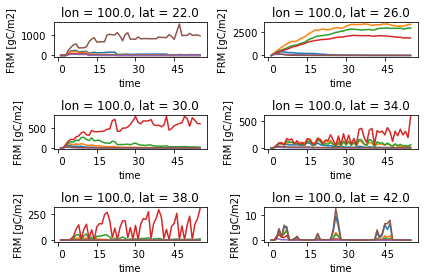

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ln = 20
ds.PFTbiomass.attrs['long_name'] = 'FRM'
pbiomasst=ds.PFTbiomass.isel(lat=28, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=29, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds.PFTbiomass.isel(lat=30, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=31, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)

pbiomasst=ds.PFTbiomass.isel(lat=32, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.PFTbiomass.isel(lat=33, lon=ln, fates_levpft=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()

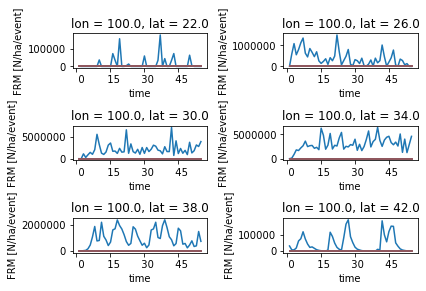

In [17]:

fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ln = 20
ds.M8_SCLS.attrs['long_name'] = 'FRM'
pbiomasst=ds.M8_SCLS.isel(lat=28, lon=ln, fates_levscls=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.M8_SCLS.isel(lat=29, lon=ln, fates_levscls=pft)
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds.M8_SCLS.isel(lat=30, lon=ln, fates_levscls=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.M8_SCLS.isel(lat=31, lon=ln, fates_levscls=pft)
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)

pbiomasst=ds.M8_SCLS.isel(lat=32, lon=ln, fates_levscls=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.M8_SCLS.isel(lat=33, lon=ln, fates_levscls=pft)
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()

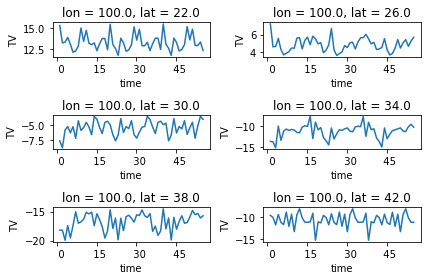

In [18]:

fig, axes = plt.subplots(ncols=2, nrows=3)
pft=[0,1,2,3,4,5]
ln = 20
tK=273
ds.TV.attrs['long_name'] = 'T'
pbiomasst=ds.TV.isel(lat=28, lon=ln)-tK
pbiomasst.plot.line(x='time', ax=axes[0, 0], add_legend=False)
pbiomasst=ds.TV.isel(lat=29, lon=ln)-tK
pbiomasst.plot.line(x='time', ax=axes[0, 1], add_legend=False)

pbiomasst=ds.TV.isel(lat=30, lon=ln)-tK
pbiomasst.plot.line(x='time', ax=axes[1, 0], add_legend=False)
pbiomasst=ds.TV.isel(lat=31, lon=ln)-tK
pbiomasst.plot.line(x='time', ax=axes[1, 1], add_legend=False)

pbiomasst=ds.TV.isel(lat=32, lon=ln)-tK
pbiomasst.plot.line(x='time', ax=axes[2, 0], add_legend=False)
pbiomasst=ds.TV.isel(lat=33, lon=ln)-tK
pbiomasst.plot.line(x='time', ax=axes[2, 1], add_legend=False)
plt.tight_layout()
plt.draw()